# **Principal Component Analysis**

**Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode (connected = True)

In [3]:
df = px.data.iris() # Iris dataset

In [4]:
df = df.drop(['petal_length', 'species_id'], axis=1) # Only 3 features are considered

In [5]:
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


In [6]:
df.corr().style.background_gradient(cmap='coolwarm') # Correlation between features as a heatmap

,sepal_length,sepal_width,petal_width
sepal_length,1.000000,-0.109369,0.817954
sepal_width,-0.109369,1.000000,-0.356544
petal_width,0.817954,-0.356544,1.000000


In [7]:
feats = df.columns[:-1]

## Checking the range of each feature

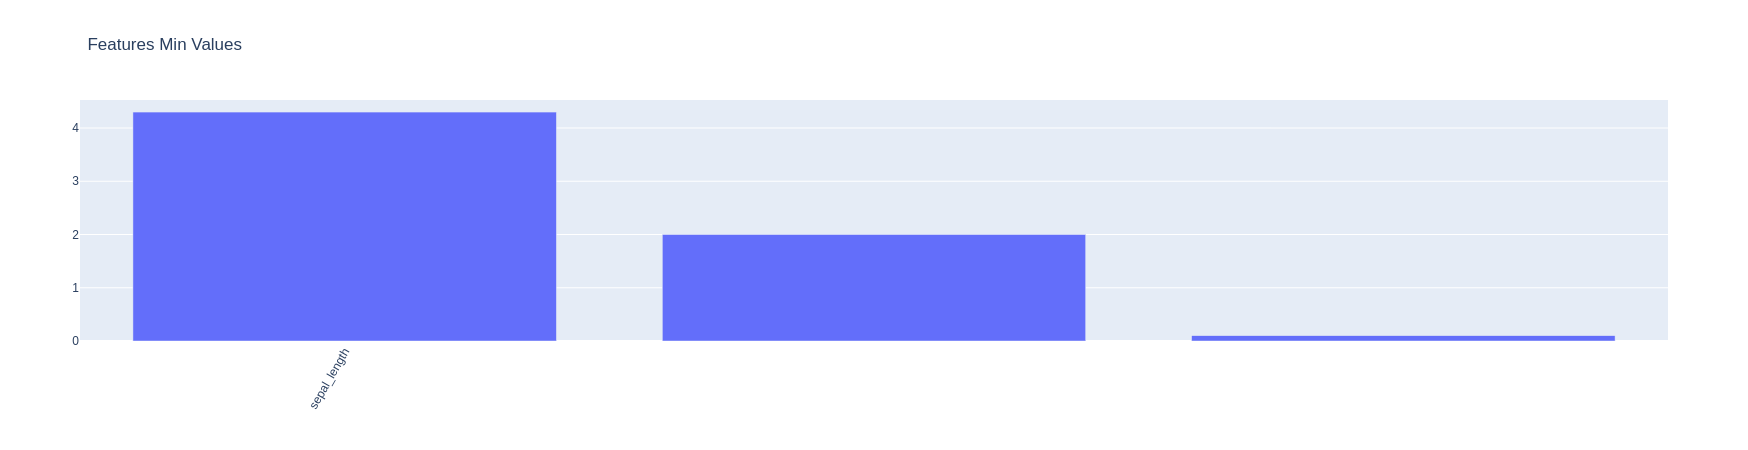

In [8]:
fig = px.bar(df[feats].min(), title='Features Min Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

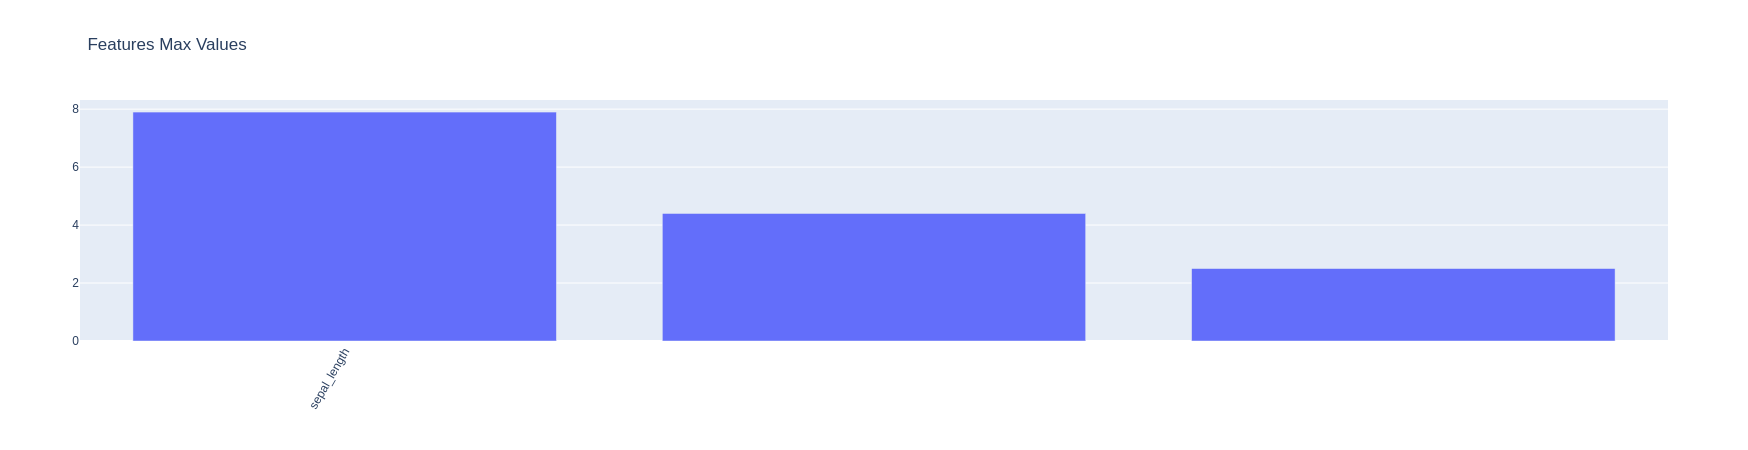

In [9]:
fig = px.bar(df[feats].max(), title='Features Max Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

## Scaling the features using standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(df[feats])

In [11]:
scaled = pd.DataFrame(scaler, columns=feats)
scaled['species'] = df['species']
scaled

,sepal_length,sepal_width,petal_width,species
0,-0.900681,1.032057,-1.312977,setosa
1,-1.143017,-0.124958,-1.312977,setosa
2,-1.385353,0.337848,-1.312977,setosa
3,-1.506521,0.106445,-1.312977,setosa
4,-1.021849,1.263460,-1.312977,setosa
...,...,...,...,...
145,1.038005,-0.124958,1.447956,virginica
146,0.553333,-1.281972,0.922064,virginica
147,0.795669,-0.124958,1.053537,virginica
148,0.432165,0.800654,1.447956,virginica


## After scaling

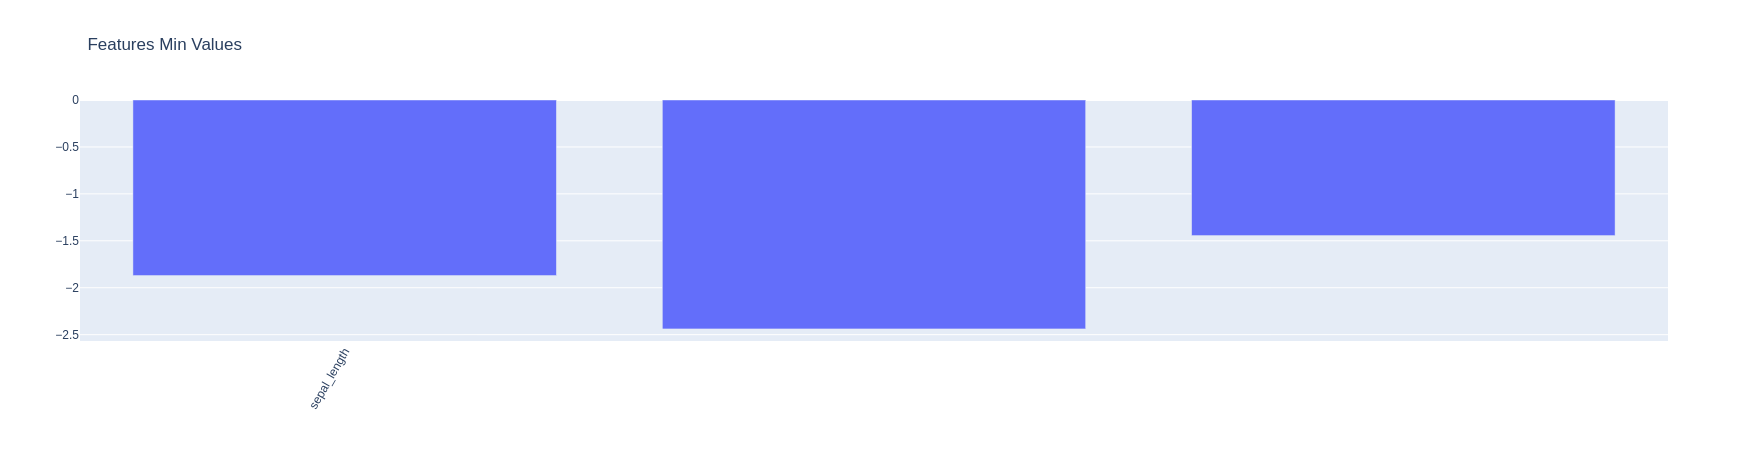

In [12]:
fig = px.bar(scaled[feats].min(), title='Features Min Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

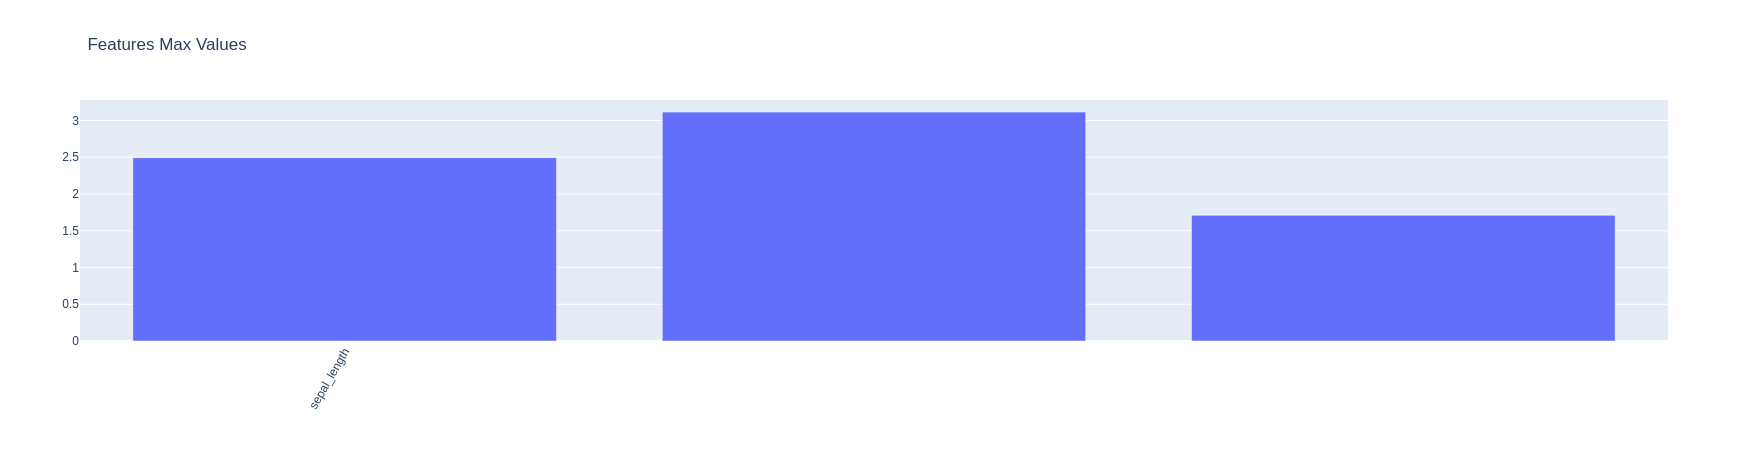

In [13]:
fig = px.bar(scaled[feats].max(), title='Features Max Values')
fig.layout.xaxis.tickangle = 300
fig.update_traces(showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

# Before PCA

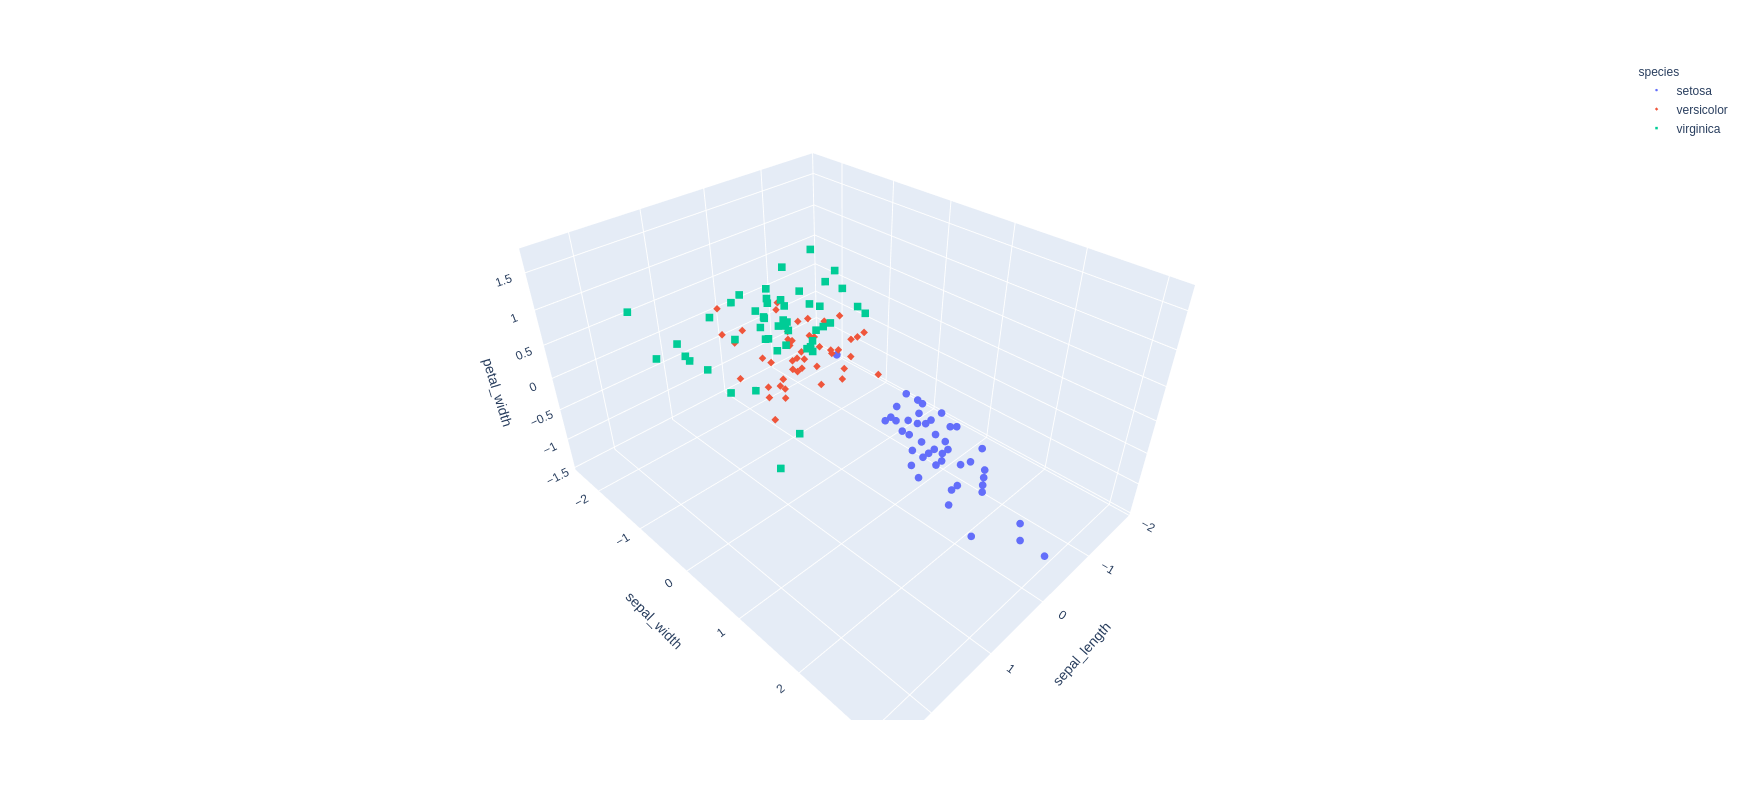

In [14]:
fig = px.scatter_3d(scaled, x='sepal_length', y='sepal_width', z='petal_width',
              color='species', symbol='species')
fig.update_layout(width=800, height=800)
fig.update_traces(marker=dict(size=2.5))
fig.show()

In [15]:
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


In [16]:
X, y = df.drop(['species'], axis=1), df['species']

In [17]:
from sklearn.decomposition import PCA

In [18]:
# Function to create pca with 'n' components
def create_pca(X, y, n_components=None):
    if (n_components != None):
        pca = PCA(n_components)
    else:
        pca = PCA()
    trans = pca.fit_transform(X)
    trans = pd.DataFrame(trans)
    trans['species'] = y
    return pca, trans

# After PCA

In [19]:
pca1, trans1 = create_pca(X=X, y=y, n_components=3)
pca2, trans2 = create_pca(X=X, y=y, n_components=2)
pca3, trans3 = create_pca(X=X, y=y, n_components=1)

## n components = 3

In [20]:
pca1.explained_variance_ratio_

array([0.8004668 , 0.14652357, 0.05300962])

In [21]:
# Eigenvectors for the 3 variables
pca1.components_

array([[ 0.73255285, -0.11049104,  0.671683  ],
       [ 0.42368818,  0.84631288, -0.32286659],
       [-0.53278011,  0.52110099,  0.66678266]])

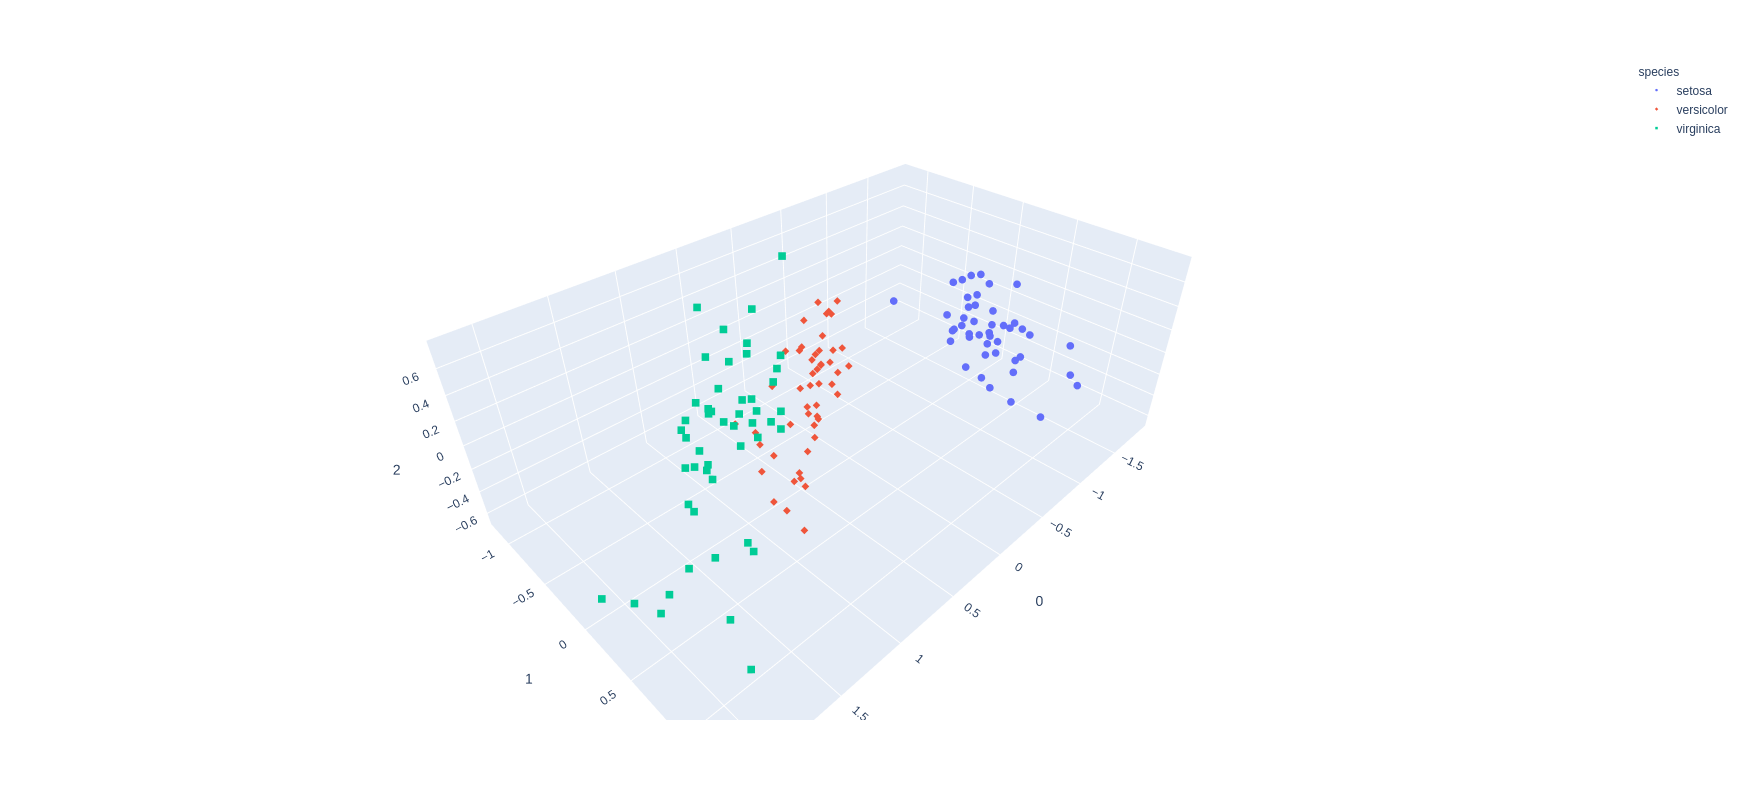

In [22]:
fig = px.scatter_3d(trans1, x=0, y=1, z=2, color='species', symbol='species')
fig.update_layout(width=800, height=800)
fig.update_traces(marker=dict(size=2.5))
fig.show()

## n components = 2

In [23]:
pca2.explained_variance_ratio_

array([0.8004668 , 0.14652357])

In [24]:
# Eigenvectors for the s variables
pca2.components_

array([[ 0.73255285, -0.11049104,  0.671683  ],
       [ 0.42368818,  0.84631288, -0.32286659]])

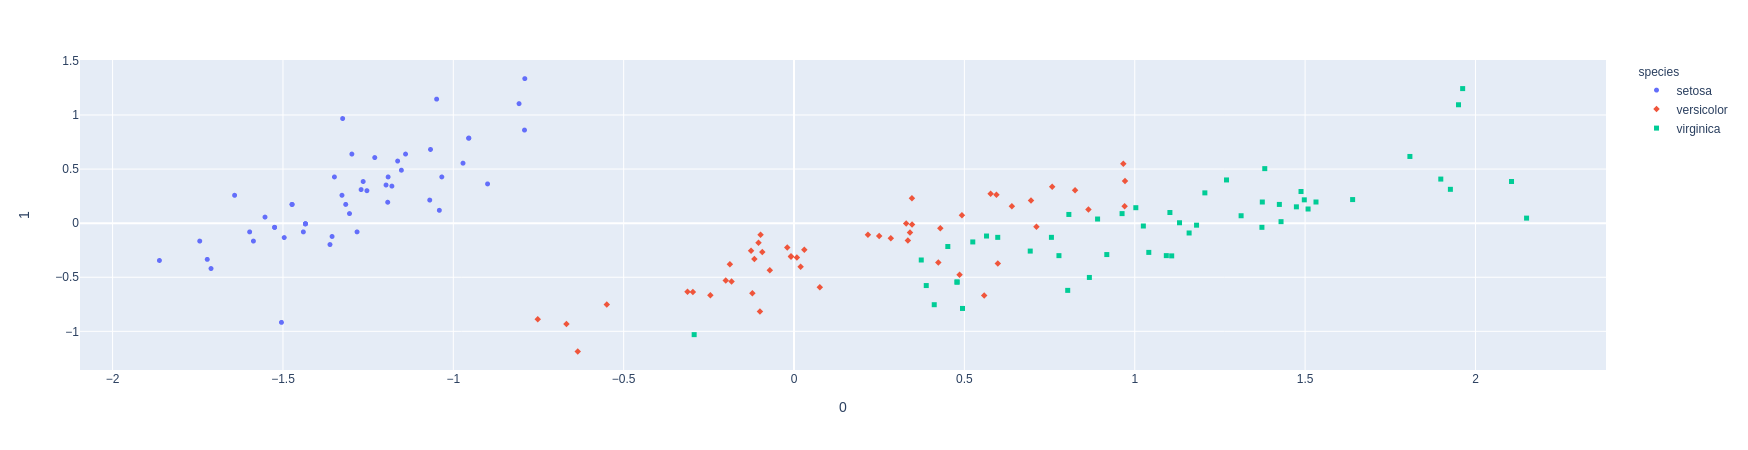

In [25]:
fig = px.scatter(trans2, x=0, y=1, color='species', symbol='species')
fig.update_traces(marker=dict(size=5))
fig.show()

## n components = 1

In [26]:
pca3.explained_variance_ratio_

array([0.8004668])

In [27]:
# Eigenvectors for the 1 variable
pca3.components_

array([[ 0.73255285, -0.11049104,  0.671683  ]])

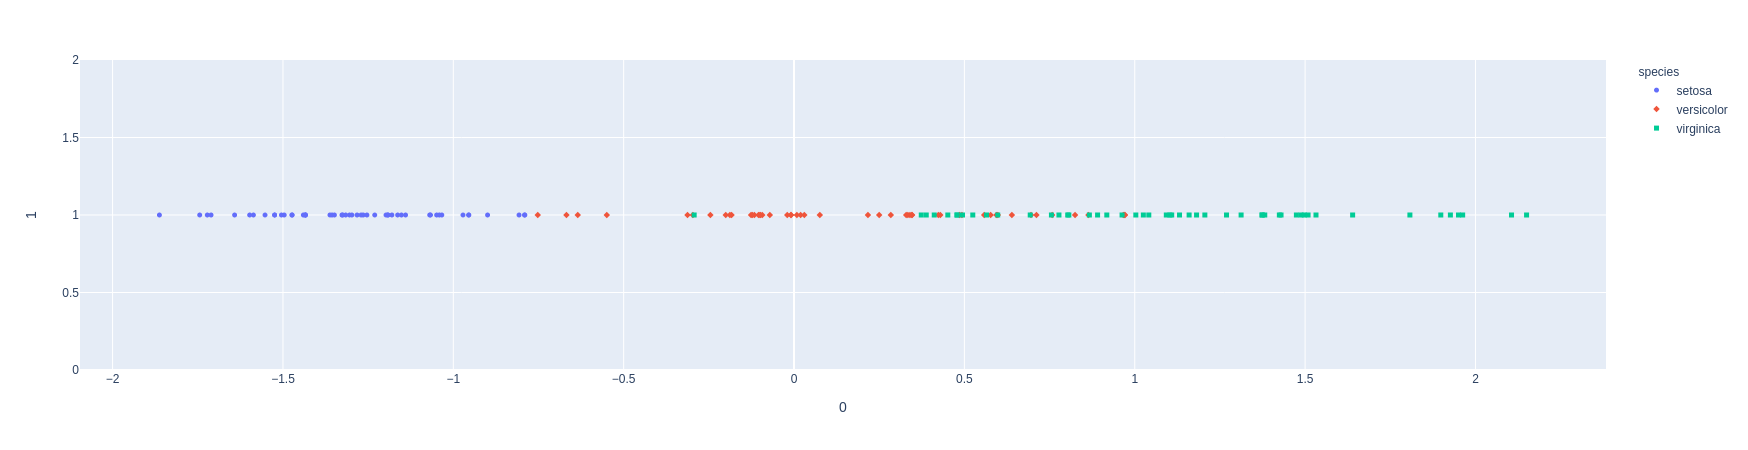

In [28]:
trans3[1] = np.zeros_like(trans3[0]) + 1
fig = px.scatter(trans3, x=0, y=1, color='species', symbol='species')
fig.update_traces(marker=dict(size=5))
fig.show()